# Project: House Price Prediction with Machine Learning - Linear Regression

### Table of Contents
* Introduction
* Exploratory Data Analysis (EDA)
* Data Visualization
* Data Modeling using Algorithm
* Evaluation and Conclusion

### Problem Statement

The goal of this data science project is to use the house price dataset to construct a regression machine-learning system for forecasting the cost of homes.
To implement a machine learning model capable of predicting the best future house sale prices.

### Introduction

Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting.

To predict the sale prices i'm going to use the following linear regression algorithms: Ordinal Least Square (OLS) algorithm, Ridge regression algorithm, Lasso regression algorithm, Bayesian regression algorithm, and lastly Elastic Net regression algorithm. These algorithms can be feasibly implemented in python with the use of the scikit-learn package.


#### EDA

- Import necessary libraries (module)
- Observe data
- Clean data where necessary
- Analyse

In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
import pickle
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') 
plt.rcParams['figure.figsize'] = (20, 10) 

In [2]:
df = pd.read_csv('house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

* Data Cleaning

The data type of the years column above are recognise as int instead of date_type. There is no missing value in this dataset, so therefore i have little cleaning to do only with the dtype and probably dropping columns not needed.

In [6]:
#Bathrooms can only a single figure or double (nothing like decimal)

df['date'] = pd.to_datetime(df['date'])
df['price'] = df['price'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503




Lets look at the highest house sales price and which year

In [8]:
df.sort_values('price', ascending = False).head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000,6,8,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,2014-06-11,7060000,5,4,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,2014-09-19,6890000,6,7,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [9]:
df[['price','bedrooms']].groupby('bedrooms').mean('price').sort_values('price',ascending = False)

,price
bedrooms,
8,1.105077e+06
7,9.514478e+05
9,8.939998e+05
6,8.258535e+05
10,8.200000e+05
5,7.868741e+05
33,6.400000e+05
4,6.355647e+05
11,5.200000e+05


In [10]:
# Drop the un-needed columns
col_ToDrop = ['id','date']
df.drop(columns = col_ToDrop, inplace=True)

#### Data Visualization

<AxesSubplot:>

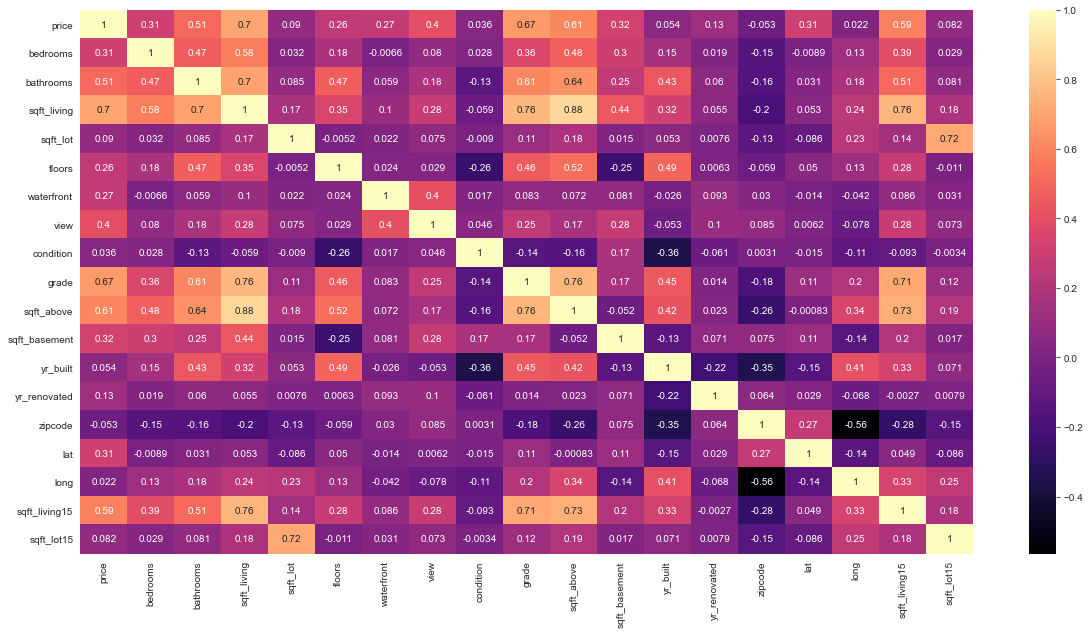

In [11]:
sb.heatmap(df[1:].corr(), annot = True, cmap = 'magma')


C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


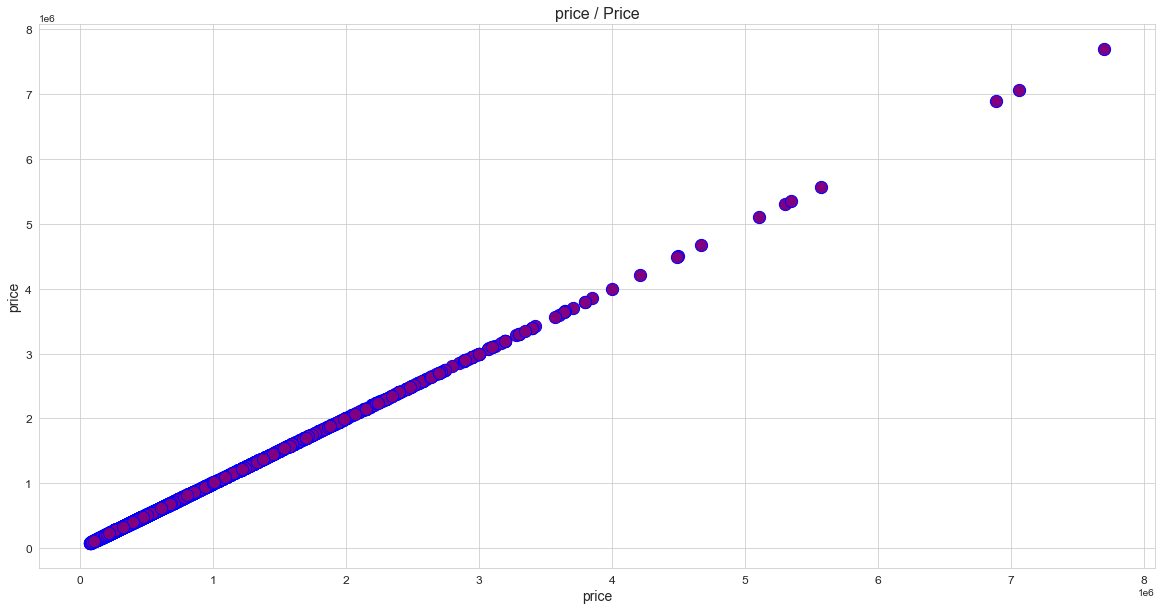

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


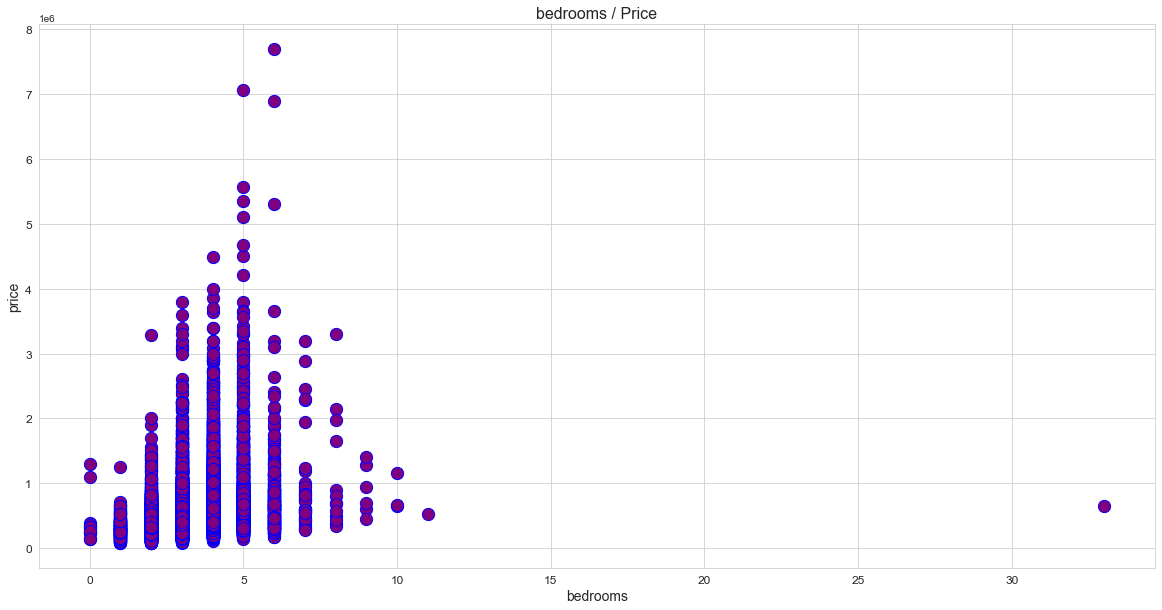

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


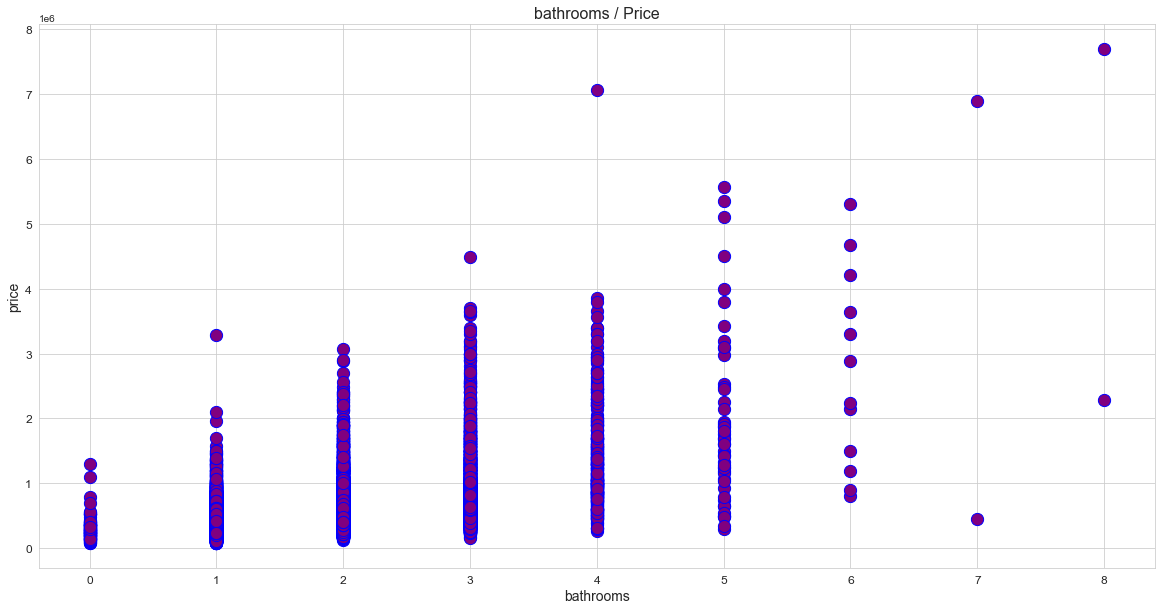

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


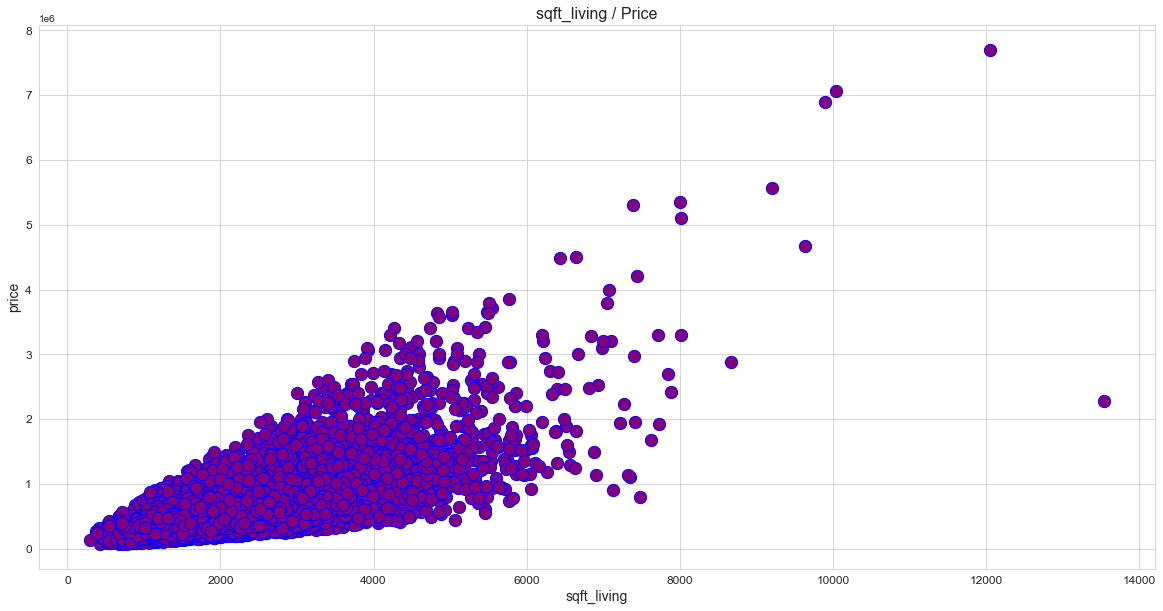

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


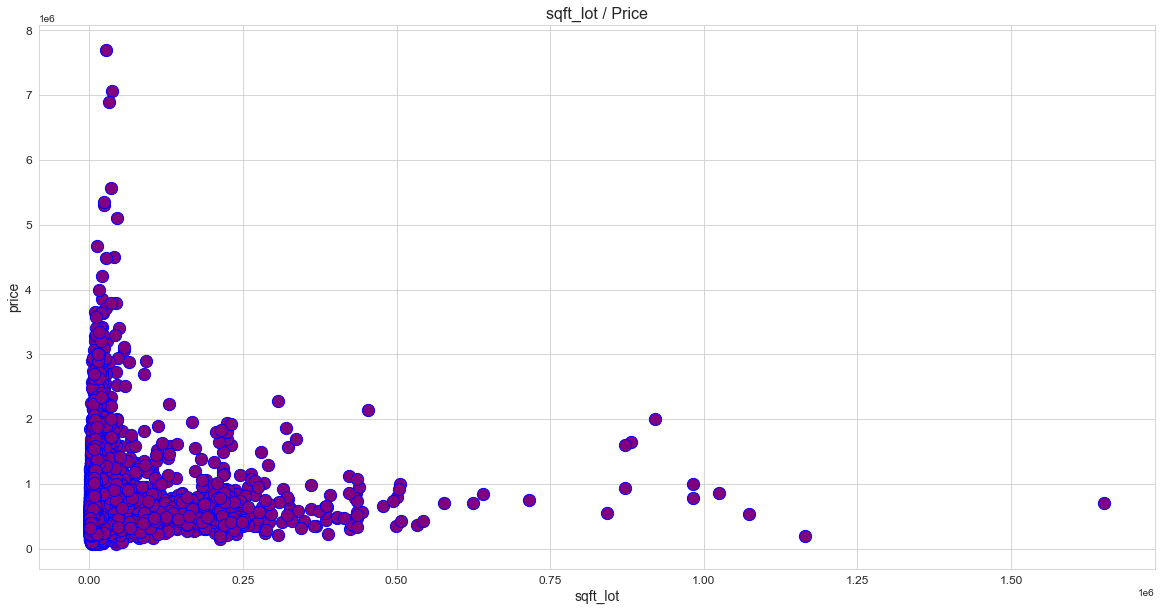

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


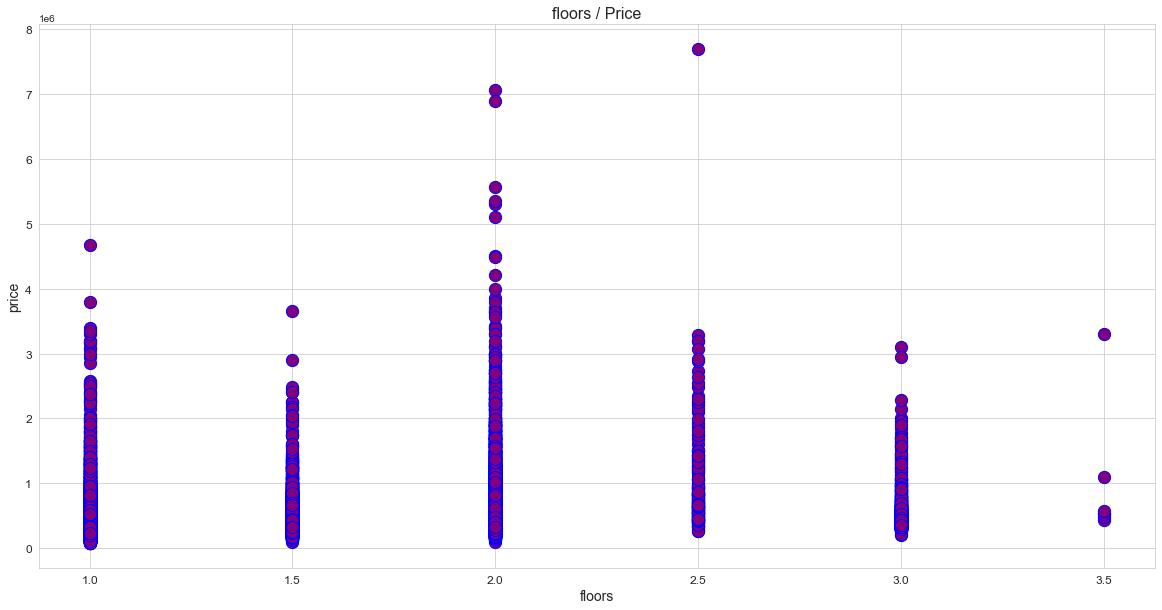

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


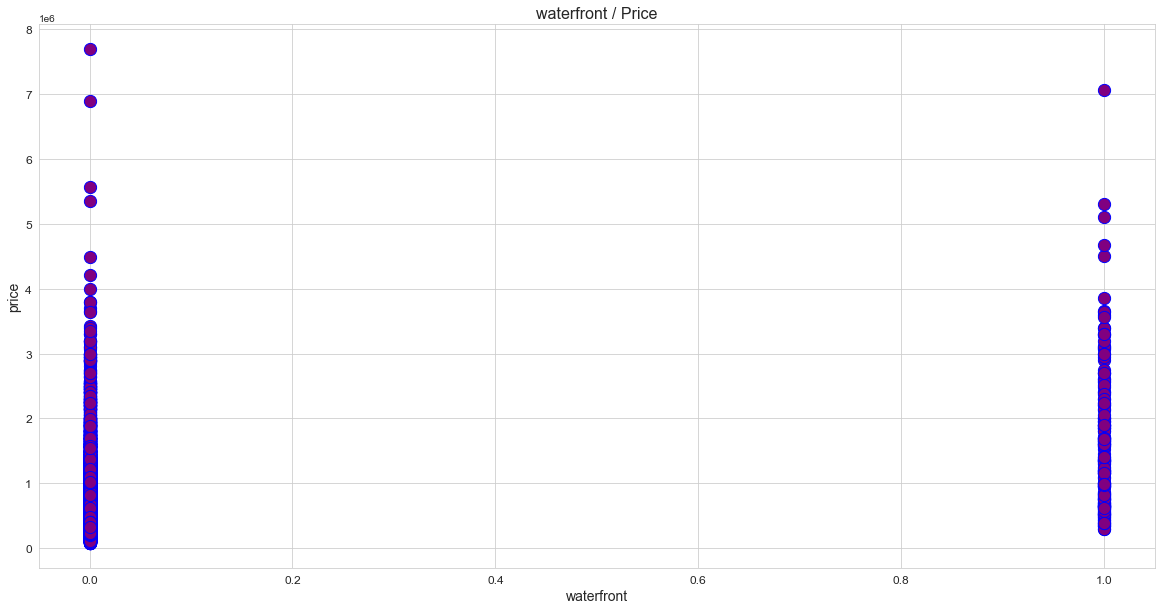

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


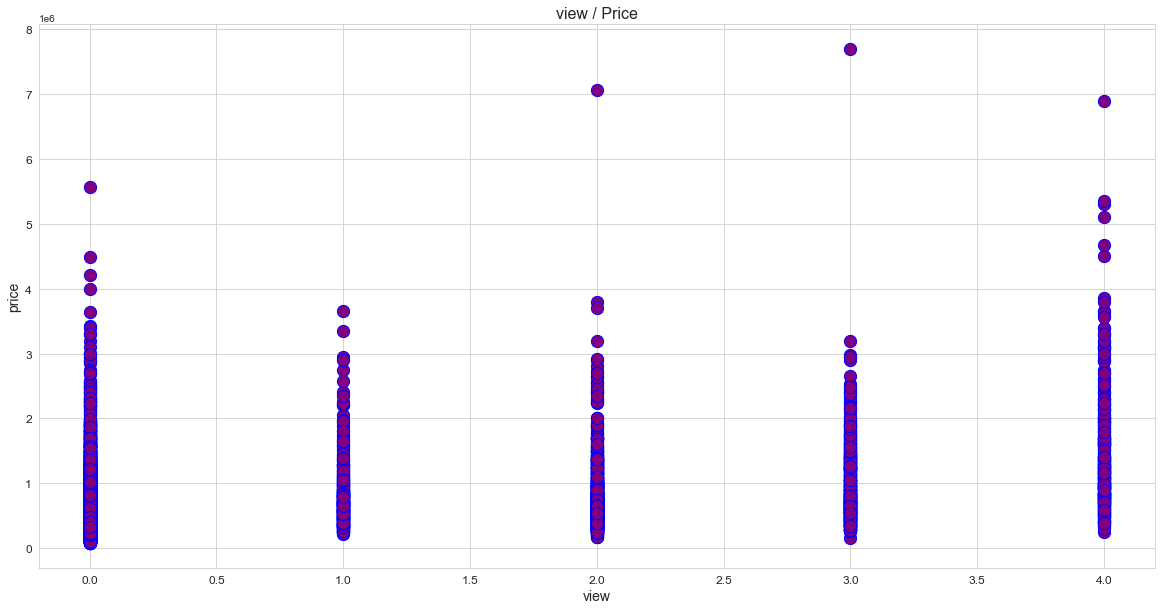

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


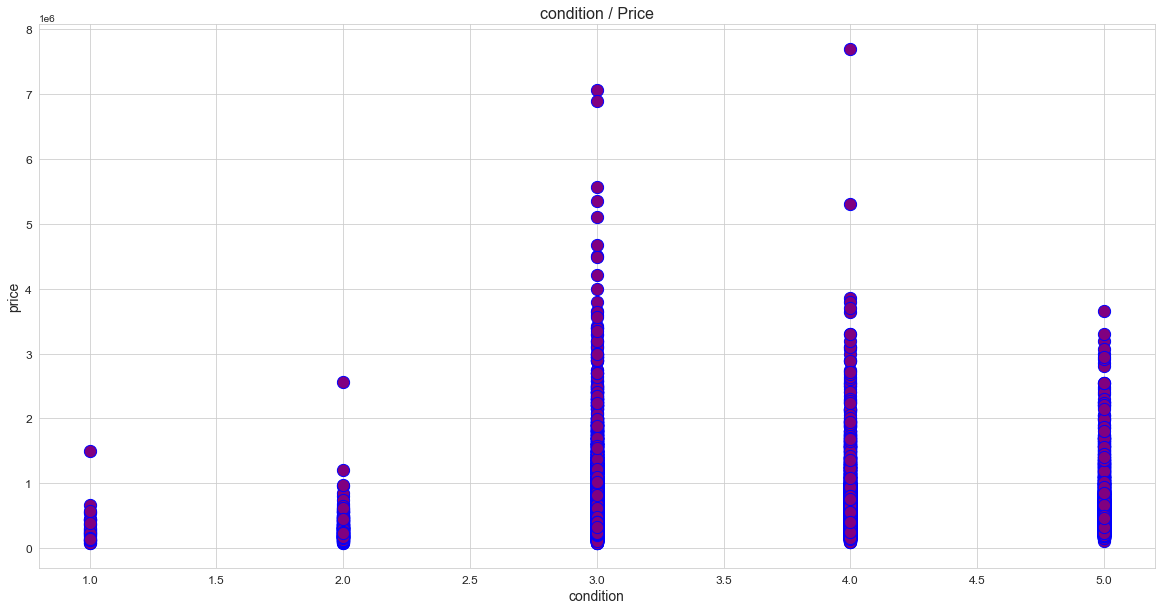

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


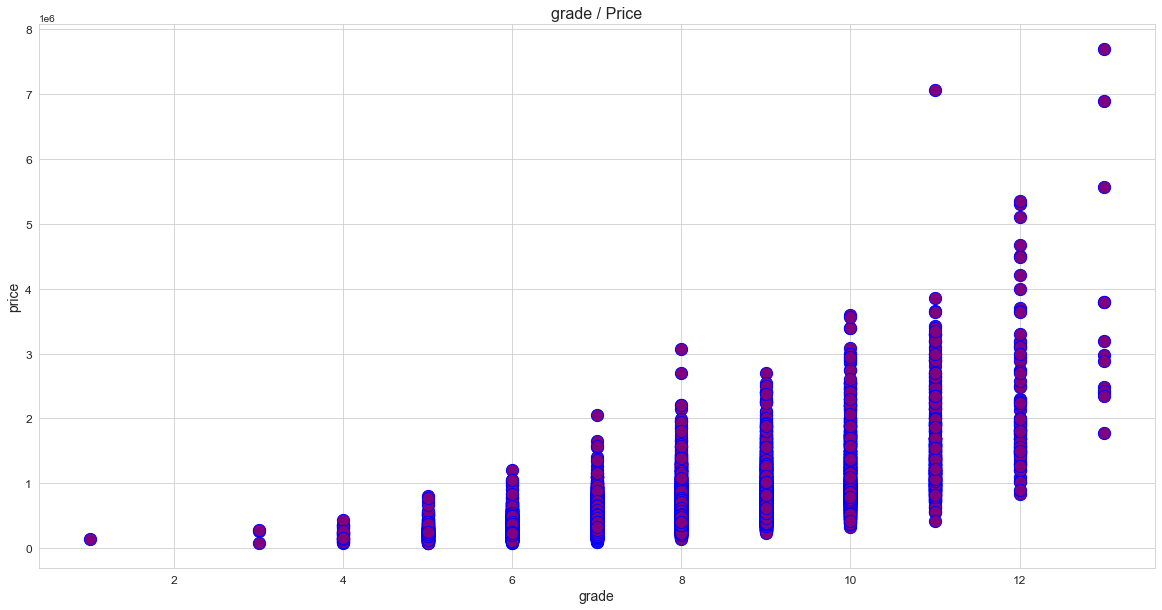

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


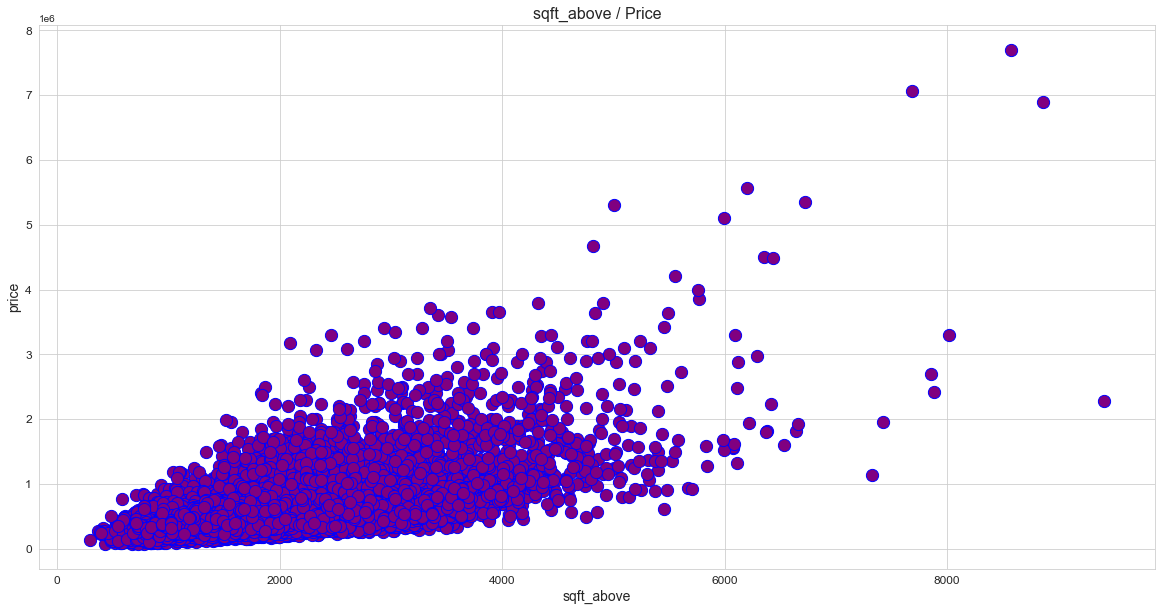

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


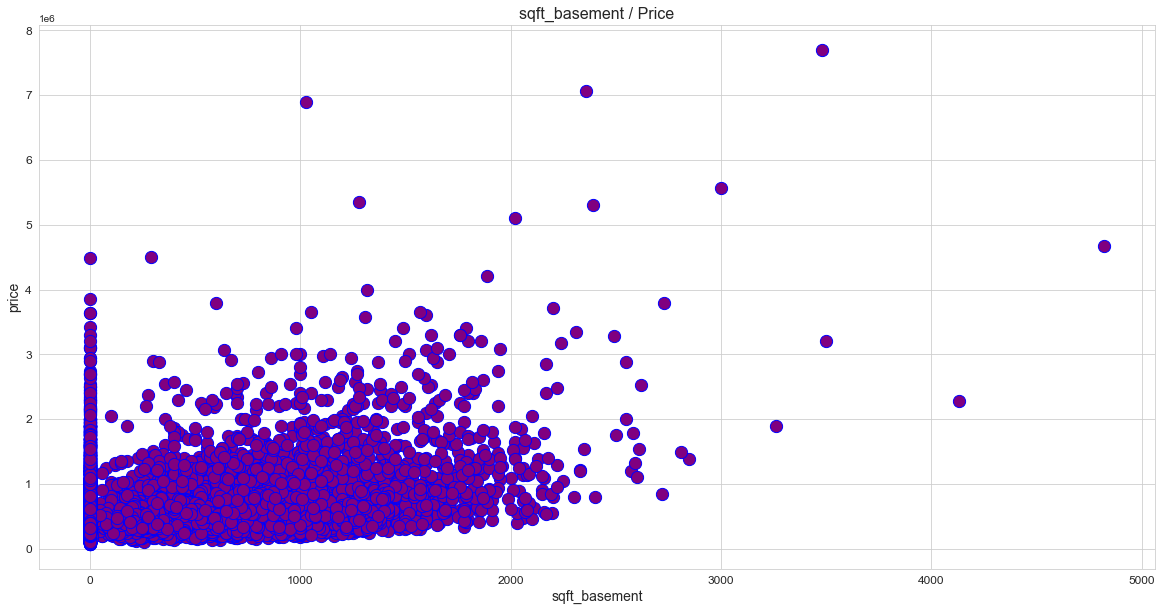

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


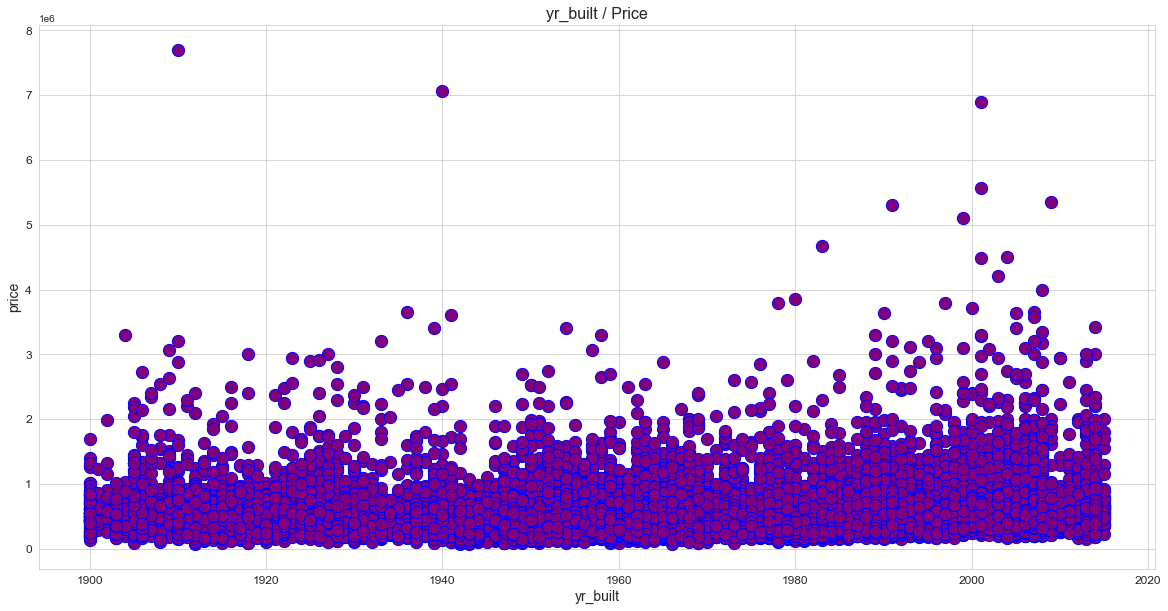

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


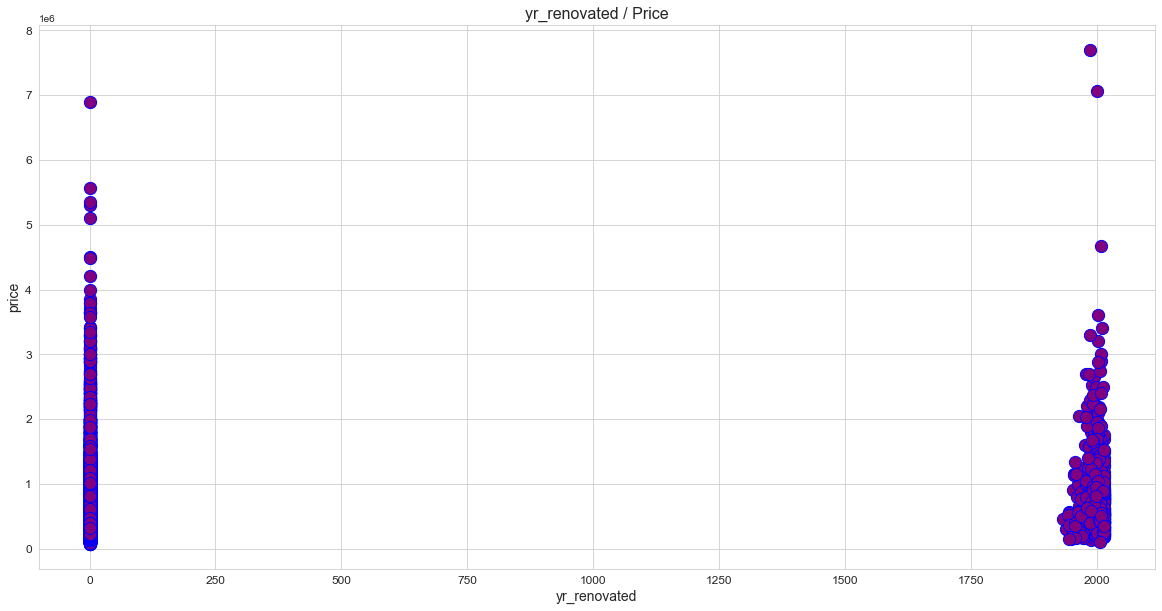

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


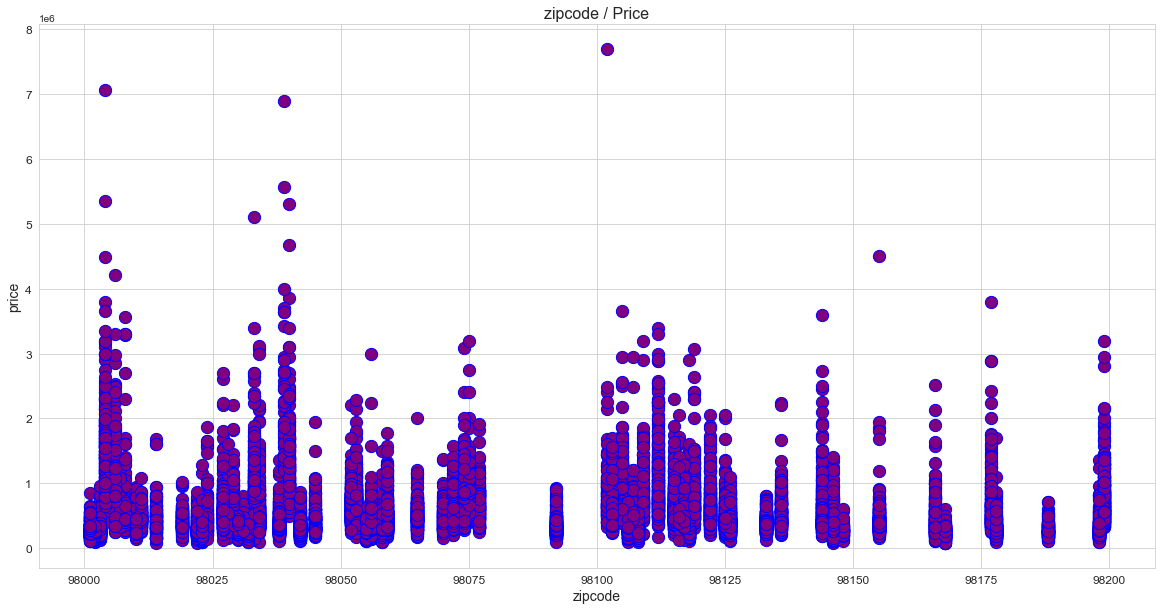

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


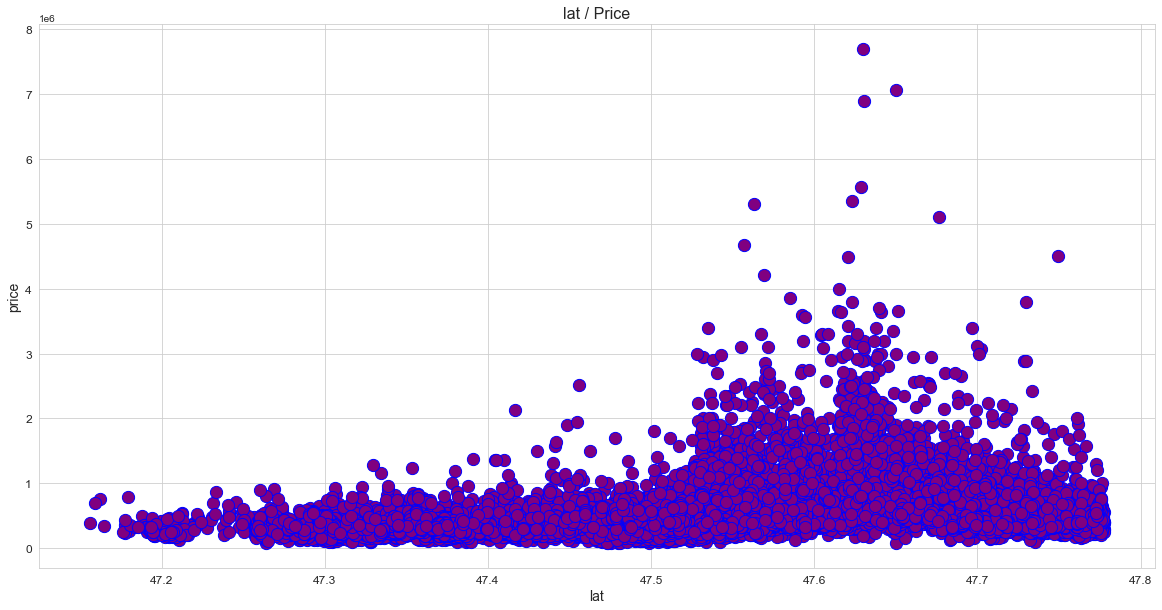

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


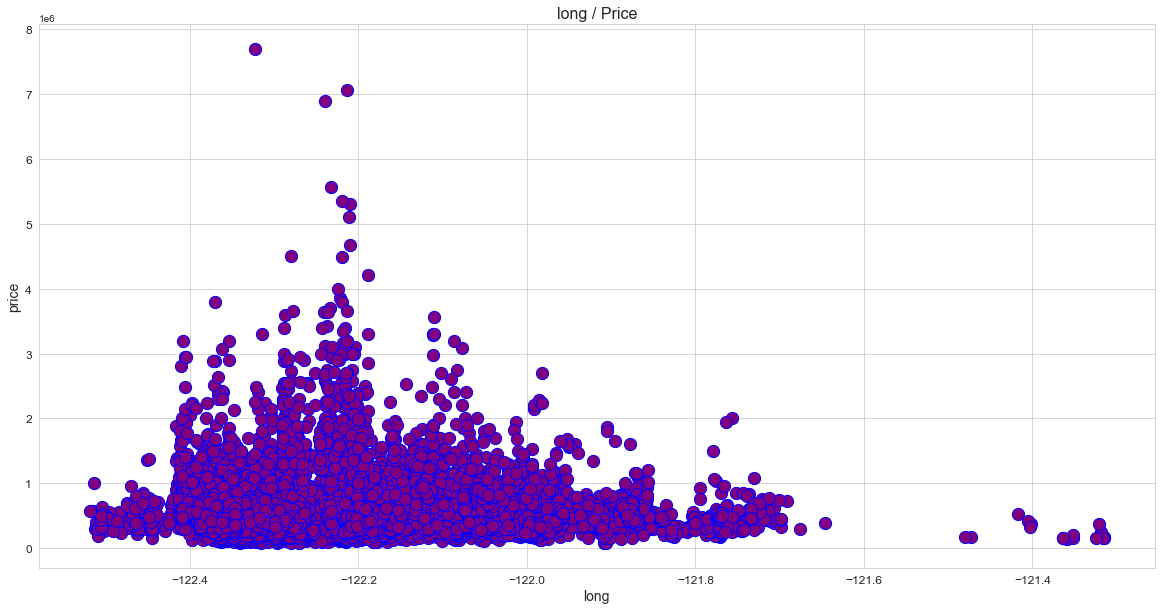

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


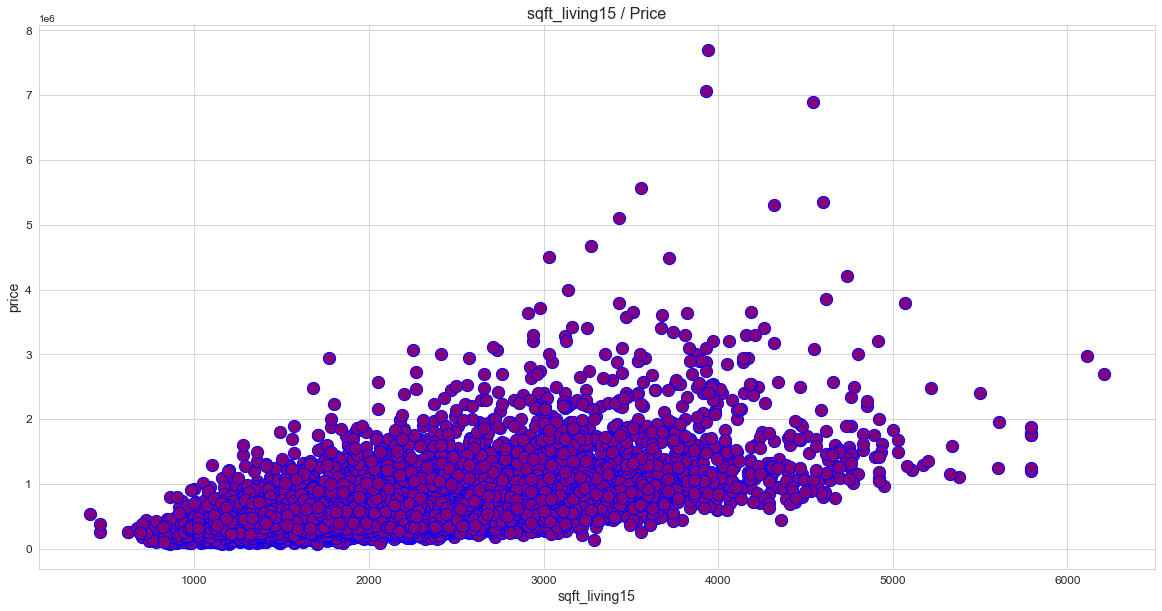

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


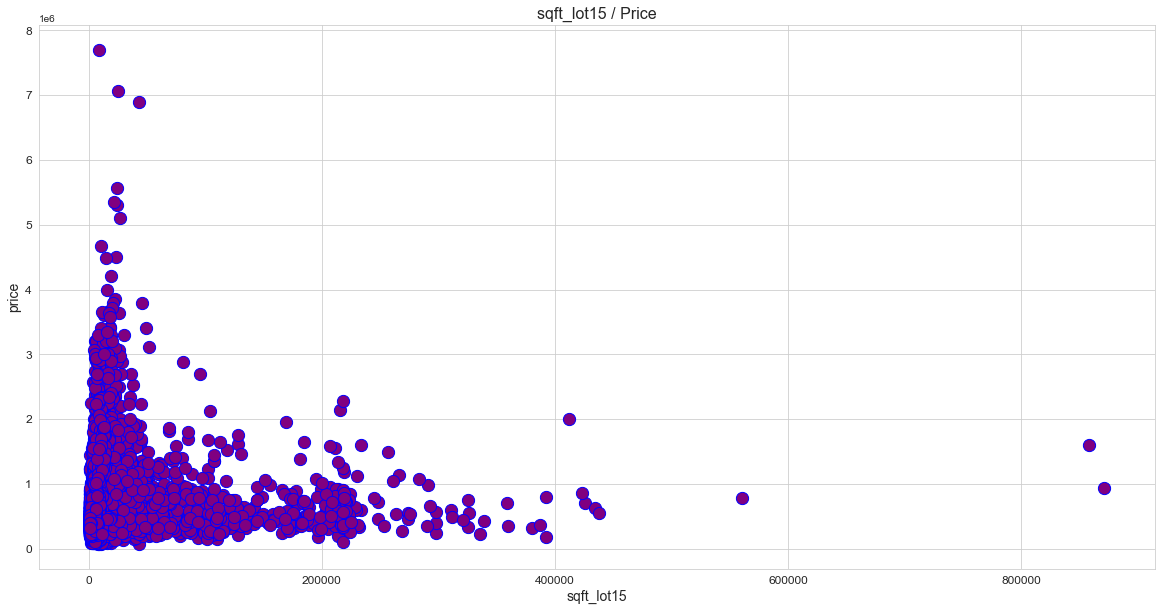

In [12]:
def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    for cols in i:
        plot = sb.scatterplot(cols, y_var, data = df, color = 'purple', edgecolor = 'b', s = 150)
        plt.title('{} / Price'.format(cols), fontsize = 16)
        plt.xlabel('{}'.format(cols), fontsize = 14)
        plt.ylabel('price', fontsize = 14)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.show()
        
scatter_df('price')

C:\Users\BUYPOWER\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


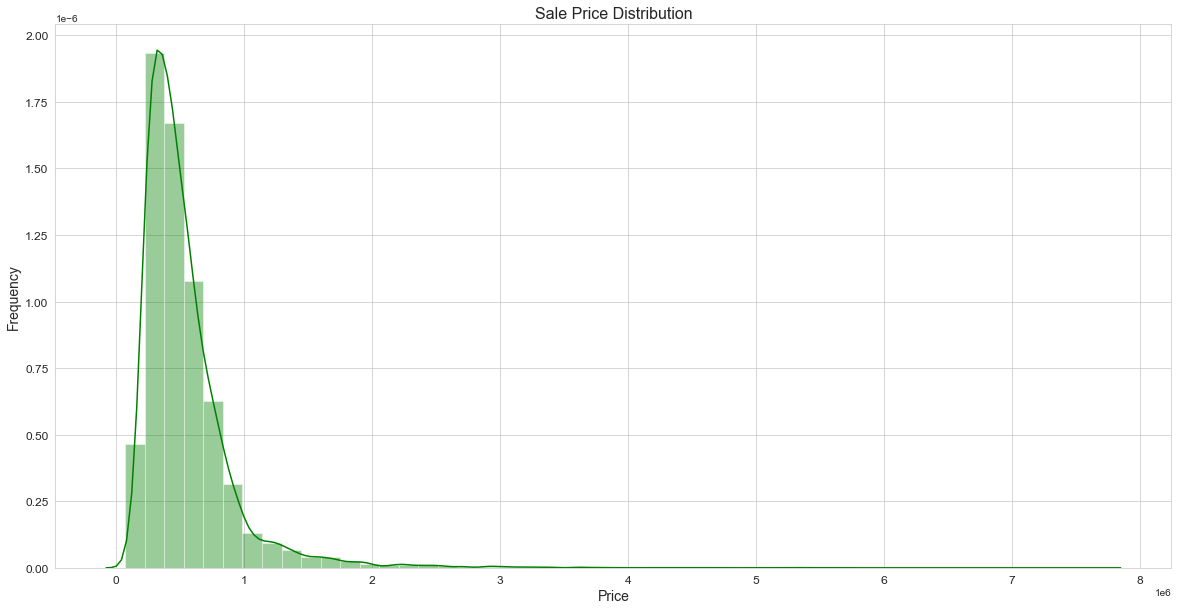

In [13]:
sb.distplot(df['price'], color = 'g')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

#### Data Modeling using Algorithm

In [14]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
#Split data and select feature

X_var = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement','yr_built', 'yr_renovated', 'zipcode','lat','long','sqft_living15','sqft_lot15']].values
y_var = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(('X_train samples : '), X_train[0:3])
print(('X_test samples : '), X_test[0:3])
print(('y_train samples : '), y_train[0:3])
print(('y_test samples : '), y_test[0:3])
X_train.shape , X_test.shape

X_train samples :  [[ 3.00000e+00  1.00000e+00  1.57000e+03  5.51000e+03  1.00000e+00
   0.00000e+00  0.00000e+00  4.00000e+00  7.00000e+00  1.07000e+03
   5.00000e+02  1.94000e+03  0.00000e+00  9.81150e+04  4.76942e+01
  -1.22319e+02  1.77000e+03  6.38000e+03]
 [ 3.00000e+00  2.00000e+00  1.78000e+03  1.10000e+04  1.00000e+00
   0.00000e+00  0.00000e+00  4.00000e+00  8.00000e+00  1.21000e+03
   5.70000e+02  1.98000e+03  0.00000e+00  9.80060e+04  4.75574e+01
  -1.22149e+02  2.31000e+03  9.70000e+03]
 [ 3.00000e+00  1.00000e+00  1.09000e+03  9.86200e+03  1.00000e+00
   0.00000e+00  0.00000e+00  3.00000e+00  8.00000e+00  1.09000e+03
   0.00000e+00  1.98700e+03  0.00000e+00  9.80740e+04  4.76256e+01
  -1.22036e+02  1.71000e+03  9.86200e+03]]
X_test samples :  [[ 2.00000e+00  1.00000e+00  1.43000e+03  1.65000e+03  3.00000e+00
   0.00000e+00  0.00000e+00  3.00000e+00  7.00000e+00  1.43000e+03
   0.00000e+00  1.99900e+03  0.00000e+00  9.81250e+04  4.77222e+01
  -1.22290e+02  1.43000e+03  1.6

((17290, 18), (4323, 18))

#### OLS Model

In [16]:
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

In [17]:
# Explained variance score metric

print(('EXPLAINED VARIANCE SCORE:'))
print(('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat))))

EXPLAINED VARIANCE SCORE:
Explained Variance Score of OLS model is 0.6967473374619241


In [18]:
#R-square score 

print(('R-SQUARED:'))
print(('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat))))

R-SQUARED:
R-Squared of OLS model is 0.6965433798988879


#### Ridge Model

In [19]:
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

In [20]:
print(('EXPLAINED VARIANCE SCORE:'))
print(('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat))))

EXPLAINED VARIANCE SCORE:
Explained Variance Score of Ridge model is 0.6967829958439464


In [21]:
print(('R-SQUARED:'))
print(('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat))))

R-SQUARED:
R-Squared of Ridge model is 0.6965784700531111


#### Lasso Model

In [22]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

C:\Users\BUYPOWER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 325694203376796.0, tolerance: 240120828240.2951
  model = cd_fast.enet_coordinate_descent(


In [23]:
print(('EXPLAINED VARIANCE SCORE:'))
print(('Explained Variance Score of Ridge model is {}'.format(evs(y_test, lasso_yhat))))

EXPLAINED VARIANCE SCORE:
Explained Variance Score of Ridge model is 0.6967473597094918


In [24]:
print(('R-SQUARED:'))
print(('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat))))

R-SQUARED:
R-Squared of Lasso model is 0.6965434016858179


#### Bayesian Model

In [25]:
bayesian = BayesianRidge()
bay = bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

In [26]:
print(('EXPLAINED VARIANCE SCORE:'))
print(('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat))))

EXPLAINED VARIANCE SCORE:
Explained Variance Score of Bayesian model is 0.6968098792405036


In [27]:
print(('R-SQUARED:'))
print(('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat))))

R-SQUARED:
R-Squared of Bayesian model is 0.6966049141371364


#### ElasticNet Model

In [28]:
en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

C:\Users\BUYPOWER\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 380100562625498.2, tolerance: 240120828240.2951
  model = cd_fast.enet_coordinate_descent(


In [29]:
print(('EXPLAINED VARIANCE SCORE:'))
print(('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat))))

EXPLAINED VARIANCE SCORE:
Explained Variance Score of ElasticNet is 0.6945763556978641


In [30]:
print(('R-SQUARED:'))
print(('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat))))

R-SQUARED:
R-Squared of ElasticNet is 0.6943075072862444


### Evaluate the model

Review the above model and pick the one with the highest score to use for website/Api deployment

In [31]:
pickle.dump(bay,open('BayesianRidge.pkl','wb'))

In [32]:
df.to_csv('ready_data.csv',)